### 统计学：检验心理学现象

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。



自变量：文字条件是否一致；

因变量：同一个参与者说出同等大小的列表中的墨色名称的时间

### 提出假设

### H0:  u1 = u2 ;    H1:  u1 != u2； 
H0为原假设，H1为对立假设，u表示总体均值，u1为文字条件一致的对照组总体均值，u2为文字条件不一致的实验组总体均值
#### H0：在文字条件不一致的情况下，实验参与者的平均完成时间和文字条件一致时的平均完成时间没有差异；
#### H1：在文字条件不一致的情况下，实验参与者的平均完成时间和文字条件一致时的平均完成时间具有明显差异

执行双尾配对T检验（two tails dependent t test for paired）。

- 首先这是一个抽样实验，实验对象是抽样得到的样本而不是总体；
- 其次这个实验是针对同一个参与者设计的，是一种重复测量实验，适合使用配对T检验；
- 最后实验组的预期结果不是单调的，所以采取双尾度量值。

In [2]:
# 导入模块
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from math import sqrt

In [5]:
# 载入数据
df = pd.read_csv('stroopdata.csv')

In [24]:
# 查看数据‘干净’情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
D              24 non-null float64
dtypes: float64(3)
memory usage: 656.0 bytes


In [23]:
# 获取描述性统计数值
df.describe()

,Congruent,Incongruent,D
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


In [11]:
# 生成组间差异列，并计算描述性数值
df['D'] = df['Incongruent'] - df['Congruent']
print('MEAN:' + str(df['D'].mean()),
      'STD:' + str(df['D'].std()),
      'd:' + str(df['D'].mean()/df['D'].std()))

MEAN:7.964791666666667 STD:4.864826910359056 d:1.6372199491222625


### 字母和颜色一致的对照组实验数据为：
- 均值：14.05
- 标准差：3.56

### 字母和颜色不一致的实验组实验数据为：
- 均值：22.02
- 标准差：4.80

### 实验组和对照组的均值差异：
- 均值：7.96
- 标准差：4.86
- d值：1.64

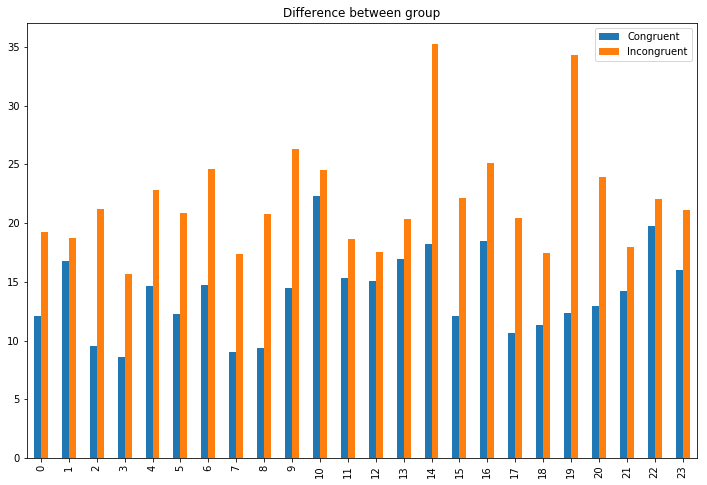

In [21]:
df[['Congruent','Incongruent']].plot(kind='bar' , figsize = (12,8) , title='Difference between group');  #绘图，查看两组差异

所有参与者在实验组的完成时间都比对照组大！！！

实验组和对照组的差异很可能具有较高显著性

设定显著性水平α=0.05

实验参与者的样本数量为24，设定自由度为23

进行推断性统计分析

In [15]:
t_margin = stats.t.isf(0.05,df = 23) #计算t临界值，设置显著性水平参数为0.05，自由度为23
moe = (df['D'].std()/sqrt(24)) * t #margin of error 计算误差范围
print(t_margin,df['D'].mean()-moe,df['D'].mean()+moe) #输出均值差异的置信区间

1.7138715277470478 6.262868163282547 9.666715170050786


t值在α=0.05,df=23,双尾条件下的临界值为1.71   

实验组和对照组均值差异的置信区间为 95%CI=(6.26,9.67)

In [23]:
stats.ttest_rel(df['Incongruent'],df['Congruent']) #输出T检验结果
t = stats.ttest_rel(df['Incongruent'],df['Congruent'])[0] #输出t值
print(stats.ttest_rel(df['Incongruent'],df['Congruent']))

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)


In [17]:
print((t*t)/(t*t+23)) #输出r^2=(t^2)/(t^2+df)

0.736636416144506


# 结论


#### 描述性数据结论
 - 实验组的完成时间均值为22.02，标准差为4.80
 - 对照组的完成时间均值为14.05，标准差为3.56
 - 两组完成时间的均值差异均值为7.96，标准差为4.86


#### 推断性数据结论
 - H0原假设被推翻，实验组和对照组存在明显差异
 - t(23)=8.02, p<0.01（α=0.05）, 双尾
 - 95%CI of D=(6.26,9.67) #两组实验数据均值差异的95%置信区间




#### 效应量度量
 - d of D=1.64 #D表示组间均值差异
 - r^2=0.74

两组数据均值差异较大，决定系数为0.74，实验组和对照组的数据解释程度较高

### 综上所述
实验组和对照组存在明显差异（α=0.05），文字条件不一致会明显增加实验参与者的完成时间。

### 提出假设
人用来处理文字和颜色的大脑功能是独立的，当两者处理结果相悖时，大脑需要额外时间来进行高阶判断

下一步可以进行对照实验，更改实验规则为：参与者需要说出文字的内容，而非颜色；检验颜色是否会干扰参与者对文字的判断